
NAG
64.7045164337
62.4431248493
59.3223258931
55.5304404058
51.2499429737
46.6515114095
41.8898226539
37.1007276388
32.3995846788
27.8810534367
23.6194129444
19.6707884633
16.0748803247
12.8591911576
10.0447532008
7.65262050633
5.70515105971
4.20902416521
3.13091187503
2.39873305442
1.92861526751
1.64726476562
1.49810315045
1.43857036986
1.4367353311
1.46851858943
1.51586561685
1.56547146042
1.60798295028
1.63737596461
1.64996526117
1.64438964869
1.62094266744
1.58135983572
1.5280611827
1.4642597985
1.39352788286
1.31951893445
1.24577772531
1.17527918179
1.11044583812
1.0528900058
1.00334712335
0.961696401236
0.927119017365
0.898290370873
0.873675346678
0.851754734974
0.831215205942
0.811061192625
0.790670894167
0.769776174761
0.748396520863
0.726818708567
0.705512670692
0.684989708214
0.665752260427
0.648246418109
0.632815940063
0.619671891053
0.608889392351
0.600426100469
0.594128298384
0.589765505112
0.587052182605
0.585676843356
0.585327825988
0.585711172905
0.586564339715
0.58766

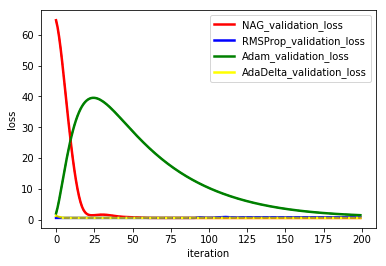

In [3]:
from sklearn.datasets import load_svmlight_file as load
import numpy as np
import matplotlib.pyplot as plt

#================================= definition ================================

def compute_loss(w, x, y):
    n = x.shape[0]
    total = 0
    for z in range(n):
        total += np.log(1 + np.exp(np.sum(-y[z]*x[z]*w)))
    loss = lamb * np.sum(np.square(w)) / 2 + total/n
    print(loss)
    return loss


def NAG(w, v_w, mu):
    for i in range(iteration):
        num = 0
        w_ahead = w + mu * v_w
        w_gradient = np.zeros((x_train.shape[1],1))

        # parts of samples
        pad = np.random.randint(1, 5)
        for j in range(0, x_train.shape[0], pad):
            num += 1
            temp = 1 + np.exp(np.sum(y_train[j] * x_train[j] * w_ahead))
            w_gradient += np.sum(y_train[j] / temp)* x_train[j].T

        dw = learning_rate * lamb * w_ahead - learning_rate * w_gradient / num
        v_w = mu * v_w - learning_rate * dw
        w += v_w
        NAG_validation_loss.append(compute_loss(w, x_validation, y_validation))


def RMSprop(w, eps, decay_rate, cache_w):
    for i in range(iteration):
        num = 0
        w_gradient = np.zeros((x_train.shape[1],1))

        # parts of samples
        pad = np.random.randint(1, 5)
        for j in range(0, x_train.shape[0], pad):
            num += 1
            temp = (1 + np.exp(np.sum(y_train[j] * x_train[j] * w)))
            w_gradient += np.sum(y_train[j] / temp) * x_train[j].T

        dw = learning_rate * lamb * w - learning_rate * w_gradient / num
        cache_w = decay_rate * cache_w + (1 - decay_rate) * np.square(dw)
        w += - learning_rate * dw / (np.sqrt(cache_w) + eps)

        RMSProp_validation_loss.append(compute_loss(w, x_validation, y_validation))


def Adam(w, eps, m_w, v_w, beta1=0.9, beta2=0.999):
    for i in range(iteration):
        w_gradient = np.zeros((x_train.shape[1],1))
        num = 0

        # parts of samples
        pad = np.random.randint(1, 5)
        for j in range(0, x_train.shape[0], pad):
            num += 1
            temp = (1 + np.exp(np.sum(y_train[j] * x_train[j] * w)))
            w_gradient += np.sum(y_train[j] / temp) * x_train[j].T

        dw = learning_rate * lamb * w - learning_rate * w_gradient / num
        m_w = beta1 * m_w + (1 - beta1) * dw
        v_w = beta2 * v_w + (1 - beta2) * np.square(dw)
        w += - learning_rate * m_w / (np.sqrt(v_w) + eps)

        Adam_validation_loss.append(compute_loss(w, x_validation, y_validation))


def AdaDelta(w, eps, n_steps = 50, decay_rate = 0.9 ):
    for i in range(iteration):
        mean_gradient_w = np.zeros((x_train.shape[1], 1))
        mean_step_w = np.zeros((x_train.shape[1], 1))
        w_gradient = np.zeros((x_train.shape[1],1))
        num = 0

        # parts of samples
        pad = np.random.randint(1, 5)
        for j in range(0, x_train.shape[0], pad):
            num += 1
            temp = (1 + np.exp(np.sum(y_train[j] * x_train[j] * w)))
            w_gradient += np.sum(y_train[j] / temp) * x_train[j].T

        dw = learning_rate * lamb * w - learning_rate * w_gradient / num

        for k in range(n_steps):
            mean_gradient_w = decay_rate * mean_gradient_w + (1 - decay_rate) * np.square(dw)
            temp = np.sqrt(((mean_step_w + eps) / (mean_gradient_w + eps)))
            steps_w = -np.multiply(temp, dw)
            mean_step_w = decay_rate * mean_step_w + (1 - decay_rate) * np.square(steps_w)
            w += steps_w

        AdaDelta_validation_loss.append(compute_loss(w, x_validation, y_validation))


#================================= load data ================================

train_data = load('./a9a')
test_data = load('./a9a.t',n_features=123)

x_train, y_train = train_data[0], train_data[1]
x_validation, y_validation = test_data[0], test_data[1]
x_train,x_validation,y_train,y_validation = x_train.todense(),x_validation.todense(),y_train.reshape(len(y_train),-1),y_validation.reshape(len(y_validation),-1)

# ============================== initialization ============================

init_w = np.ones((x_train.shape[1],1))

iteration = 200
learning_rate = 0.1
lamb = 0.9
NAG_validation_loss=[]      #记录每次迭代的NAG的loss值    0.9
RMSProp_validation_loss=[]  #记录每次迭代的RMSProp的loss值  0.1
Adam_validation_loss=[]     #记录每次迭代的Adam的loss值    0.01
AdaDelta_validation_loss=[] #记录每次迭代的AdaDelta的loss值  0.001

#================================ training ================================

#for NAG
print('\nNAG')
NAG(init_w, v_w=0, mu=0.9 * np.ones((x_train.shape[1],1)))

#for RMSProp
print('\nRMSProp')
RMSprop(init_w, decay_rate =0.9, eps = 1e-6 * np.ones((x_train.shape[1],1)),
        cache_w = np.empty((x_train.shape[1],1)) )

#for Adam
print('\nAdam')
Adam(init_w,eps=1e-8 * np.ones((x_train.shape[1],1)), m_w = np.empty((x_train.shape[1],1)),
     v_w = np.ones((x_train.shape[1],1)), beta1=0.9, beta2=0.999)

#for AdaDelta
print('\nAdaDelta')
AdaDelta(init_w, eps = 1e-8 * np.ones((x_train.shape[1],1)), n_steps = 50, decay_rate = 0.9)


#=============================== show result =================================

t = np.arange(0, iteration, 1)
plt.plot(t, NAG_validation_loss, color="red", linewidth=2.5, linestyle="-", label="NAG_validation_loss")
plt.plot(t, RMSProp_validation_loss, color="blue",  linewidth=2.5, linestyle="-", label="RMSProp_validation_loss")
plt.plot(t, Adam_validation_loss, color="green", linewidth=2.5, linestyle="-", label="Adam_validation_loss")
plt.plot(t, AdaDelta_validation_loss, color="yellow", linewidth=2.5, linestyle="-", label="AdaDelta_validation_loss")
plt.legend(loc='upper right')
plt.plot(t, NAG_validation_loss, 'r--',t, RMSProp_validation_loss, 'b--',t,Adam_validation_loss,'g--',t,AdaDelta_validation_loss,'y--')

plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()